# Image Inpainting for Image Restoration

This can be used for restore or repair areas of an image.

## 1. What is Image Inpainting?

Image inpainting is a class of algorithms in computer vision where the objective is to fill regions inside an image or a video in a way that it fits the context of its surroundings.

Typically you are passing in an original image as well as a binary mask where the part of the mask that is white will be used to indicate the section that needs to be propagated or regenerated based on the surrounding image.

## 2. Inpainting Algorithms

In OpenCV, we can cover two different algorithms for image inpainting, one being navier stokes and the other being telia.

### 2.1 Navier-Stokes & Fast Marching

We are going to describe how the algorithm approaches this problem, if we take a look at the images below of the blue splotches the idea is that with the image on the left we want to come up with the image on the right.

In the left, the blue is the original image you could say while the black circle represents the missing information. The goal of the algorithm is to fill that spot in a way that makes as much sense as possible given the surronding context.

Technically in the original image there could have been anything there and as is often the case where you're using in painting it could be that there was a blemish or a spot there that you didn't want to be included that took away from the original image.

In the image below, our objective is to fill the dark region and obtain an image that looks like the one on the right.

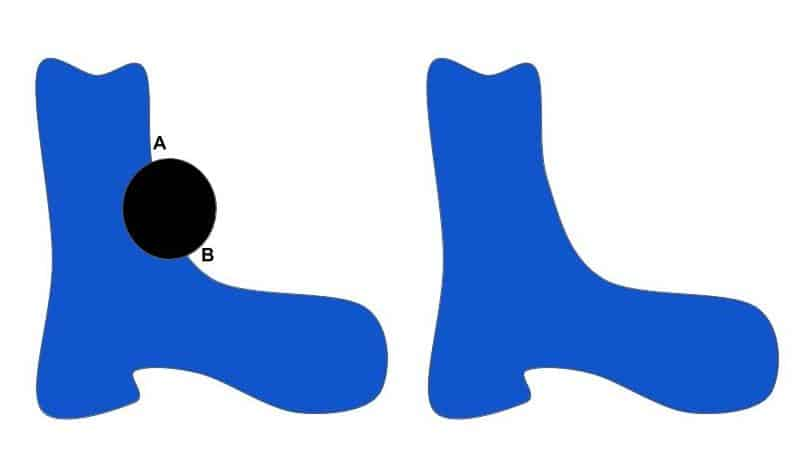

How do we fill the black region? It boils it down to two constraints, one being around preserving edge-like features and gradients and the other is to propagate smooth color information.

---

### Telia - Fast Marching Method based

This is a fast marching method based on a different paper, it follows much of the same approach where it takes in constraints to define the way it transform the image and then taking the neighborhood of pixels which is just another way of saying the pixels that are around or nearby or next to a given target pixel to estimate the colors to be inpainting.

In terms of how these two algorithms compare, in theory tha naiver stokes method is supposed to be a little bit slower in and results in blurrier outputs compared to the fast marching method, but in practive you may find that it varies a little bit and in fact in the examples here we found that the navier stokes method was both faster and a little bit better to our eyes.

As with anything in computer vision you'll need to actually apply the algorithm to your own specific use case to see what works best.

---

OpenCV syntax

dst = cv2.inpaint(src, inpaintMask, inpaintRadius, flags)

Where:

+ `src`: Source image
+ `inpaintMask`: A binary mask indicating pixels to be inpainted | The white pixels represent the pixels that need to be inpainted of the original image
+ `dst`: Destination image
+ `inpaintRadius`: Neighborhood around a pixel to inpaint. Typically, if the regions to be inpainted are thin, smaller values produce better results (less blurry).
+ `flags`: INPAINT_NS (Navier-Stokes based method) or INPAINT_TELEA (Fast marching based method) | We define which algorithm we are going to use

---

## 3. Sample Implementation

Below, we will create an interactive demo which can run either of these two inpainting algorithms.

In [7]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [8]:
class Sketcher:
    """ OpenCV Utility class for mouse handling."""
    
    def __init__(self, windowname, dests, color_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.color_func = color_func
        self.dirty = False
        self.show()
        cv2.setMouseCallback(self.windowname, self.on_mouse)
    
    def show(self):
        cv2.imshow(self.windowname, self.dests[0])
        cv2.imshow(self.windowname + ": mask", self.dests[1])
        
    def on_mouse(self, event, x, y, flags, param):
        """Hanles mouse movement and events."""
        pt = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv2.EVENT_LBUTTONUP:
            self.prev_pt = None
        
        if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.color_func()):
                cv2.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()
            

In [9]:
# Read image in color mode.
filename = "../module10/Car.jpg"
img = cv2.imread(filename, cv2.IMREAD_COLOR)

# If image is not read properly, return error.
if img is None:
    print('Failed to load image file: {}'.format(filename))

In [10]:
# Create a copy of original image.
img_mask = img.copy()
# Create a black copy of original image, acts as a mask.
inpaintMask = np.zeros(img.shape[:2], np.uint8)
# Create a sketch using OpenCV Utility Class: Sketcher.
sketch = Sketcher("image", [img_mask, inpaintMask], lambda: ((0, 255, 0), 255))

In [11]:
while True:
    ch = cv2.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        # Use Algorithm proposed by Alexendra Telea: Fast Marching Method (2004).
        t1t = time.time()
        res = cv2.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
        t2t = time.time()
        ttime = t2t-t1t
        cv2.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        # Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting (2001).
        t1n = time.time()
        res = cv2.inpaint(src = img_mask, inpaintMask = inpaintMask, inpaintRadius=3, flags=cv2.INPAINT_NS)
        t2n = time.time()
        ntime = t2n-t1n
        cv2.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

In [12]:
cv2.destroyAllWindows()